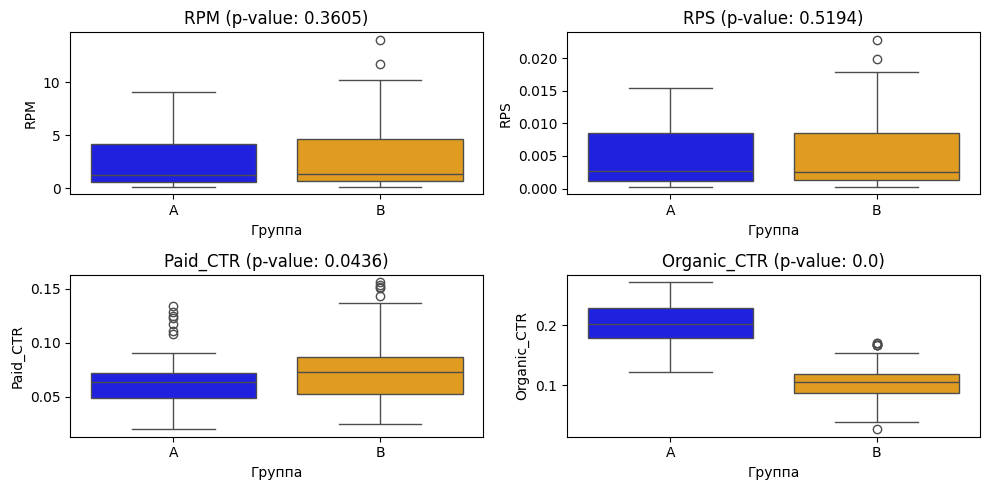

Average error in prediction RPM: 0.94
✅ Аnalysis is Complete! AI-model saved as ab_test_model.pkl


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import joblib

# Loading Data from excel file
file_path = "/content/marketpele_ab_test (2).xlsx"
df = pd.read_excel(file_path, sheet_name="marketpele_ab-test")

# 🔹 Deleting spaces
df.columns = df.columns.str.strip()

# 🔹 Metrics Calculation
df["RPM"] = (df["revenue"] / df["pageviews"]) * 1000
df["RPS"] = df["revenue"] / df["sessions"]
df["Paid_CTR"] = df["sponsord_clicks"] / df["visible_pageviews"]
df["Organic_CTR"] = df["organic_clicks"] / df["visible_pageviews"]

# 🔹 Grouping A/B
group_A = df[df["group_name"] == "A"]
group_B = df[df["group_name"] == "B"]

def t_test(metric):
    stat, p_value = stats.ttest_ind(group_A[metric], group_B[metric], equal_var=False)
    return round(p_value, 4)

# 🔹 Checking the values
p_values = {metric: t_test(metric) for metric in ["RPM", "RPS", "Paid_CTR", "Organic_CTR"]}

# 🔹 Visualization
plt.figure(figsize=(10, 5))
metrics = ["RPM", "RPS", "Paid_CTR", "Organic_CTR"]


for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df["group_name"], y=df[metric], hue=df["group_name"], palette=["blue", "orange"], legend=False)
    plt.title(f"{metric} (p-value: {p_values[metric]})")
    plt.xlabel("Группа")
    plt.ylabel(metric)

#for i, metric in enumerate(metrics, 1):
    #plt.subplot(2, 2, i)
    #sns.boxplot(x=df["group_name"], hue=df[metric], palette=["blue", "orange"], legend=False)
    #plt.title(f"{metric} (p-value: {p_values[metric]})")
    #plt.xlabel("Группа")
    #plt.ylabel(metric)

plt.tight_layout()
plt.show()

# 🔹 AI-моdel for predicting RPM
df["group_numeric"] = df["group_name"].map({"A": 0, "B": 1})
features = ["pageviews", "visible_pageviews", "sessions", "sponsord_clicks", "organic_clicks", "group_numeric"]
target = "RPM"

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Average error in prediction RPM: {mae:.2f}")

# 🔹 Model saving
joblib.dump(model, "ab_test_model.pkl")
print("✅ Аnalysis is Complete! AI-model saved as ab_test_model.pkl")
